# Software analytics: Increase code review speed — impact on global colaboration in large projects

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

https://zenodo.org/records/3922907

In [4]:
def load_data():
    data = pd.read_csv('./data/new_pullreq.csv', header=0)
    return data
data = load_data()
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,Kronos-Integration,kronos-service-consul,1,9,9.0,1,0,0,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,saltstack,salt,0,1165,NaN,1,10,0,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,mjmlio,mjml,1,8834,8834.0,2,6,0,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,zotonic,zotonic,0,703,NaN,7,15,0,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [10]:
for key in data.keys():
    print(key)

id
project_id
ownername
reponame
merged_or_not
lifetime_minutes
mergetime_minutes
num_commits
src_churn
test_churn
files_added
files_deleted
files_modified
files_changed
src_files
doc_files
other_files
num_commit_comments
num_issue_comments
num_comments
num_participants
sloc
team_size
perc_external_contribs
commits_on_files_touched
test_lines_per_kloc
test_cases_per_kloc
asserts_per_kloc
watchers
prev_pullreqs
requester_succ_rate
followers
churn_addition
churn_deletion
pr_comment_num
comment_num
perc_neg_emotion
perc_pos_emotion
perc_neu_emotion
part_num_issue
part_num_commit
part_num_pr
part_num_code
comment_conflict
hash_tag
at_tag
test_inclusion
description_length
bug_fix
ci_exists
ci_latency
ci_build_num
ci_test_passed
ci_failed_perc
ci_first_build_status
ci_last_build_status
language
fork_num
project_age
open_issue_num
pr_succ_rate
open_pr_num
first_response_time
pushed_delta
acc_commit_num
first_pr
account_creation_days
core_member
contrib_gender
contrib_country
contrib_affiliati

## Overview  & filtering of data of large projects

Number of projects: 11230


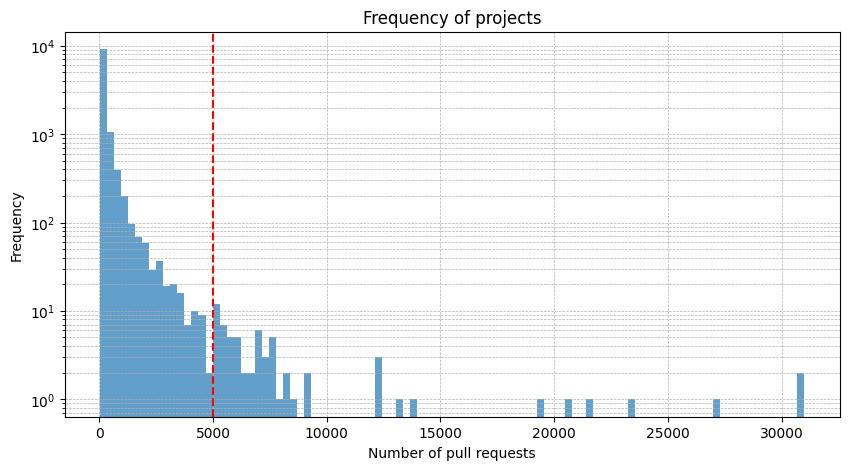

Number of project with more than 5000 pull requests: 64


In [5]:
num_projects = data['project_id'].unique()
print('Number of projects: {}'.format(len(num_projects)))

projects = data['project_id'].value_counts()
project_ids = projects.index
num_pull_requests = projects.values

plt.figure(figsize=(10, 5))
plt.hist(num_pull_requests, bins=100, alpha=0.7, log=True)
plt.axvline(x=5000, color='r', linestyle='--')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Frequency of projects')
plt.xlabel('Number of pull requests')
plt.ylabel('Frequency')
plt.show()

print('Number of project with more than 5000 pull requests: {}'.format(len(projects[num_pull_requests > 5000])))
filtered_project_ids_pr = projects[num_pull_requests > 5000].index

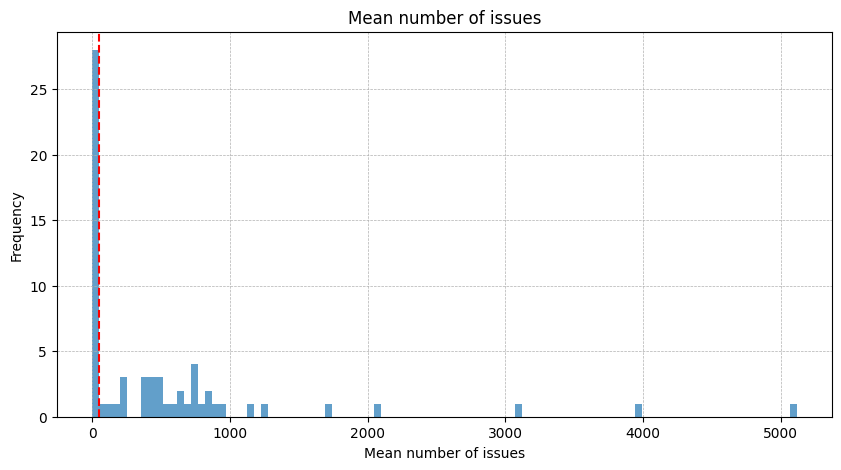

Number of project with more than 50 issues: 36


In [6]:
opened_issues = data[data['project_id'].isin(filtered_project_ids_pr)].groupby('project_id')['open_issue_num'].mean()

plt.figure(figsize=(10, 5))
plt.hist(opened_issues, bins=100, alpha=0.7)
plt.axvline(x=50, color='r', linestyle='--')
plt.xlabel('Mean number of issues')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean number of issues')
plt.show()

filtered_project_ids_issue = opened_issues[opened_issues > 50].index
print('Number of project with more than 50 issues: {}'.format(len(filtered_project_ids_issue)))

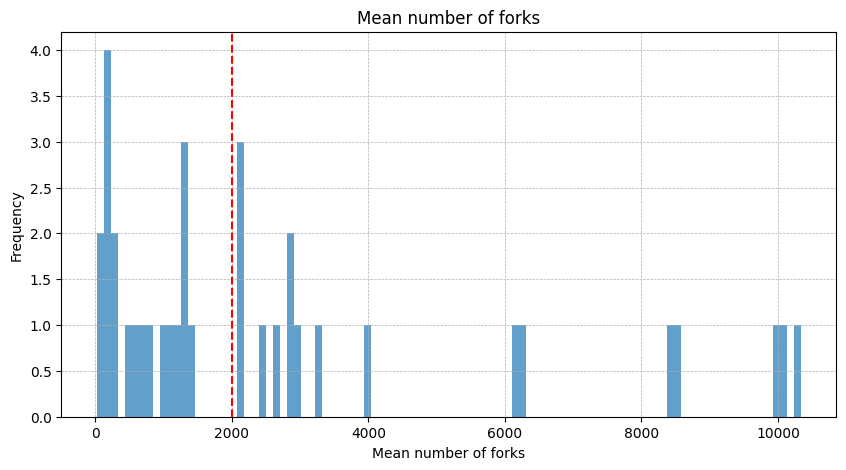

Number of project with more than 2000 forks: 17


In [7]:
forks = data[data['project_id'].isin(filtered_project_ids_issue)].groupby('project_id')['fork_num'].mean()
plt.figure(figsize=(10, 5))
plt.hist(forks, bins=100, alpha=0.7)
plt.axvline(x=2000, color='r', linestyle='--')
plt.xlabel('Mean number of forks')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean number of forks')
plt.show()

filtered_project_ids_forks = forks[forks > 2000].index
print('Number of project with more than 2000 forks: {}'.format(len(filtered_project_ids_forks)))

## Analysis of filtered data

In [13]:
print(data[data['project_id'].isin(filtered_project_ids_forks)]['reponame'].unique())
filtered_data = data[data['project_id'].isin(filtered_project_ids_forks)]
print('Number of pull requests: {}'.format(len(filtered_data)))
filtered_data

['scikit-learn' 'salt' 'metasploit-framework' 'kubernetes' 'react' 'node'
 'ansible' 'playframework' 'odoo' 'three.js' 'rails' 'matplotlib'
 'ember.js' 'pandas' 'mastodon' 'gatsby' 'spree']
Number of pull requests: 210520


,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
30,31,5219,scikit-learn,scikit-learn,0,122459,NaN,3,201,504,...,1,8,199,2,60.0,0,0.000373,0,122459,0
34,35,1142,saltstack,salt,1,4534,4534.0,1,22,0,...,0,1,0,0,49.0,1,0.000622,0,4534,0
40,41,1142,saltstack,salt,1,983,983.0,1,193,0,...,0,0,0,0,3.0,0,0.000013,0,983,0
44,45,853,rapid7,metasploit-framework,1,131,131.0,1,2,0,...,0,0,0,0,159.0,0,0.000023,0,131,0
51,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,1,3,0,0,0.0,0,0.000459,0,627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347814,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,1,13,17,3,7.0,0,0.000274,1,10204,1
3347881,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,1,9,0,0,197.0,0,0.012812,0,11373,0
3347882,3347883,853,rapid7,metasploit-framework,1,1248,1248.0,4,66,0,...,0,1,2,0,113.0,0,0.001935,0,1248,0
3347907,3347908,3905191,facebook,react,1,484,484.0,1,0,0,...,1,0,0,0,12.0,0,0.097158,0,484,0


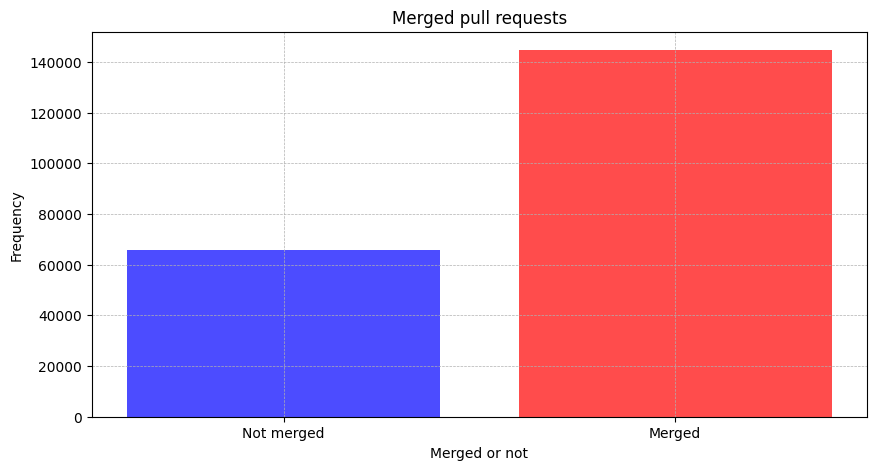

In [49]:
num_merged = filtered_data['merged_or_not'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(num_merged.index, num_merged.values, alpha=0.7, color=['blue', 'red'])
plt.xticks(num_merged.index, ['Not merged', 'Merged'])
plt.xlabel('Merged or not')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merged pull requests')
plt.show()

Mean merge time: 20004.992084013164
Median merge time: 1108.0
Standard deviation of merge time: 85618.19512469816
Minimum merge time: 0.0
Maximum merge time: 2916770.0


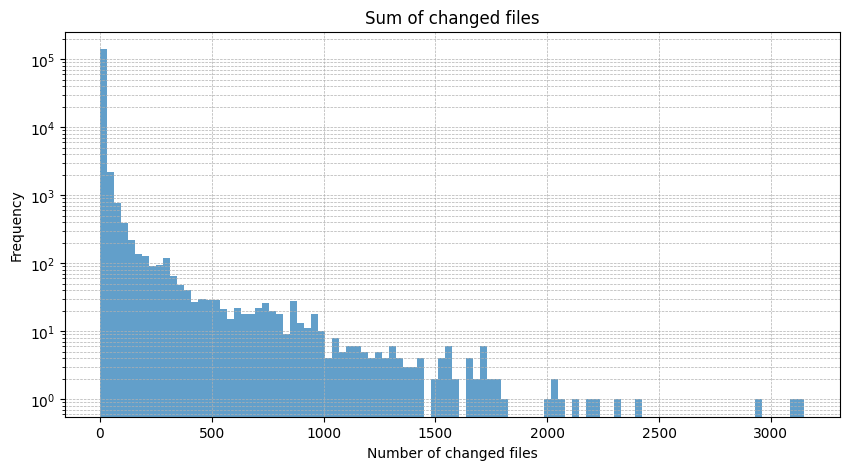

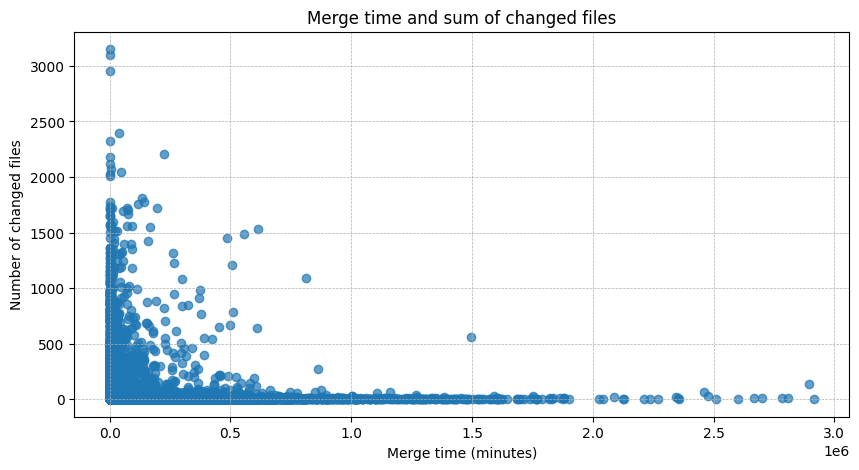

Correlation between merge time and number of changed files: PearsonRResult(statistic=0.02770299036167124, pvalue=5.773898574025175e-26)


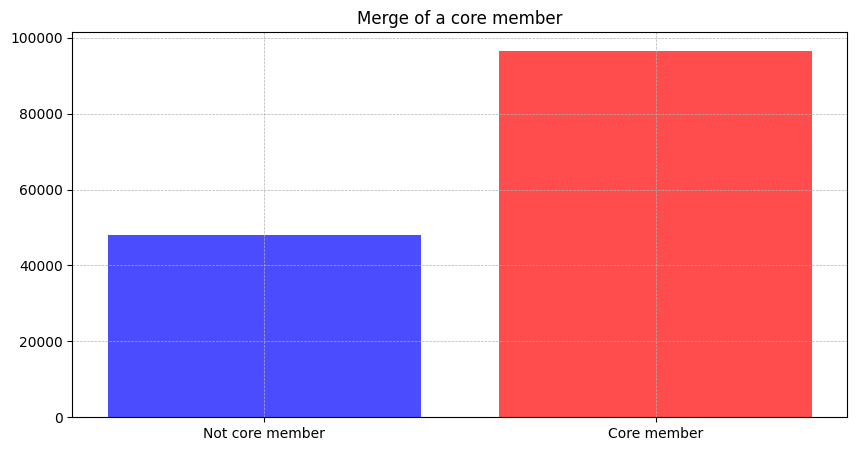

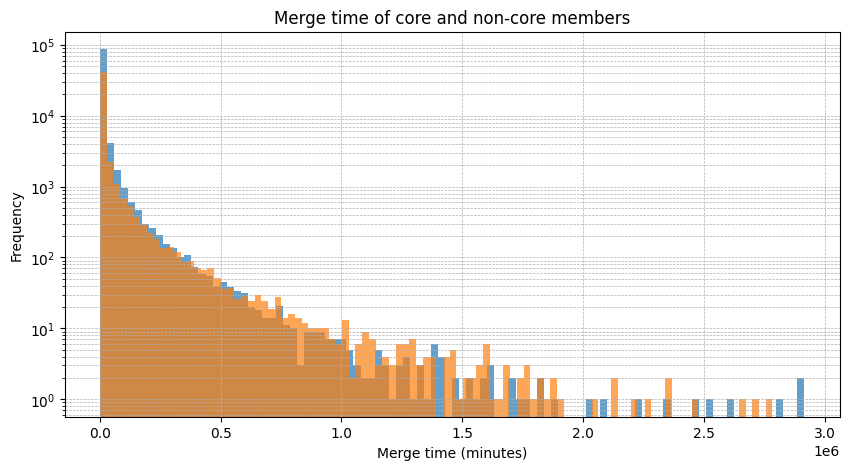

Mean merge time of core member: 16107.61065518633
Mean merge time of non-core member: 27848.375820056233
Median merge time of core member: 1096.0
Median merge time of non-core member: 1138.0
Standard deviation of merge time of core member: 70076.31302096572
Standard deviation of merge time of non-core member: 110037.94185100144
Minimum merge time of core member: 0.0
Minimum merge time of non-core member: 0.0
Maximum merge time of core member: 2916770.0
Maximum merge time of non-core member: 2784300.0
Correlation between merge time and number of changed files of core member: PearsonRResult(statistic=0.037055972197286485, pvalue=1.0134432090049162e-30)
Spearman correlation between merge time and number of changed files of core member: SignificanceResult(statistic=0.2794121712837335, pvalue=0.0)
Correlation between merge time and number of changed files of non-core member: PearsonRResult(statistic=0.019233254129202484, pvalue=2.500735156020363e-05)
Spearman correlation between merge time 

In [79]:
merged_data = filtered_data[filtered_data['merged_or_not'] == 1]

print('Mean merge time: {}'.format(merged_data['mergetime_minutes'].mean()))
print('Median merge time: {}'.format(merged_data['mergetime_minutes'].median()))
print('Standard deviation of merge time: {}'.format(merged_data['mergetime_minutes'].std()))
print('Minimum merge time: {}'.format(merged_data['mergetime_minutes'].min()))
print('Maximum merge time: {}'.format(merged_data['mergetime_minutes'].max()))

plt.figure(figsize=(10, 5))
plt.hist(merged_data['files_changed'], bins=100, alpha=0.7, log=True)
plt.xlabel('Number of changed files')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Sum of changed files')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(merged_data['mergetime_minutes'], merged_data['files_changed'], alpha=0.7)
plt.xlabel('Merge time (minutes)')
plt.ylabel('Number of changed files')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time and sum of changed files')
plt.show()

from scipy.stats.mstats import pearsonr, spearmanr

correlation_size = pearsonr(merged_data['mergetime_minutes'], merged_data['files_changed'])
print('Correlation between merge time and number of changed files: {}'.format(correlation_size))

core = merged_data['core_member'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(core.index, core.values, alpha=0.7, color=['blue', 'red'])
plt.xticks(core.index, ['Not core member', 'Core member'])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge of a core member')
plt.show()

core_data = merged_data[merged_data['core_member'] == 1]
non_core_data = merged_data[merged_data['core_member'] == 0]
plt.figure(figsize=(10, 5))
plt.hist(core_data['mergetime_minutes'], bins=100, alpha=0.7, label='Core member', log=True)
plt.hist(non_core_data['mergetime_minutes'], bins=100, alpha=0.7, label='Non-core member', log=True)
plt.xlabel('Merge time (minutes)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time of core and non-core members')
plt.show()

print('Mean merge time of core member: {}'.format(core_data['mergetime_minutes'].mean()))
print('Mean merge time of non-core member: {}'.format(non_core_data['mergetime_minutes'].mean()))
print('Median merge time of core member: {}'.format(core_data['mergetime_minutes'].median()))
print('Median merge time of non-core member: {}'.format(non_core_data['mergetime_minutes'].median()))
print('Standard deviation of merge time of core member: {}'.format(core_data['mergetime_minutes'].std()))
print('Standard deviation of merge time of non-core member: {}'.format(non_core_data['mergetime_minutes'].std()))
print('Minimum merge time of core member: {}'.format(core_data['mergetime_minutes'].min()))
print('Minimum merge time of non-core member: {}'.format(non_core_data['mergetime_minutes'].min()))
print('Maximum merge time of core member: {}'.format(core_data['mergetime_minutes'].max()))
print('Maximum merge time of non-core member: {}'.format(non_core_data['mergetime_minutes'].max()))

correlation_core = pearsonr(core_data['mergetime_minutes'], core_data['files_changed'])
correlation_core_spear = spearmanr(core_data['mergetime_minutes'], core_data['files_changed'])
correlation_non_core = pearsonr(non_core_data['mergetime_minutes'], non_core_data['files_changed'])
correlation_non_core_spear = spearmanr(non_core_data['mergetime_minutes'], non_core_data['files_changed'])
print('Correlation between merge time and number of changed files of core member: {}'.format(correlation_core))
print('Spearman correlation between merge time and number of changed files of core member: {}'.format(correlation_core_spear))
print('Correlation between merge time and number of changed files of non-core member: {}'.format(correlation_non_core))
print('Spearman correlation between merge time and number of changed files of non-core member: {}'.format(correlation_non_core_spear))

correlation_prev_pr = pearsonr(merged_data['mergetime_minutes'], merged_data['prev_pullreqs'])
correlation_prev_pr_spear = spearmanr(merged_data['mergetime_minutes'], merged_data['prev_pullreqs'])
print('Correlation between merge time and previous pull requests: {}'.format(correlation_prev_pr))
print('Spearman correlation between merge time and previous pull requests: {}'.format(correlation_prev_pr_spear))

correlation_prev_commit = pearsonr(merged_data['mergetime_minutes'], merged_data['acc_commit_num'])
correlation_prev_commit_spear = spearmanr(merged_data['mergetime_minutes'], merged_data['acc_commit_num'])
print('Correlation between merge time and accumulated commits: {}'.format(correlation_prev_commit))
print('Spearman correlation between merge time and accumulated commits: {}'.format(correlation_prev_commit_spear))

import scipy.stats as stats
stats.pointbiserialr(merged_data['first_pr'], merged_data['mergetime_minutes'])
print('Correlation between merge time and first pull request: {}'.format(stats.pointbiserialr(merged_data['first_pr'], merged_data['mergetime_minutes'])))

correlation_description_len = pearsonr(merged_data['mergetime_minutes'], merged_data['description_length'])
correlation_description_len_spear = spearmanr(merged_data['mergetime_minutes'], merged_data['description_length'])
print('Correlation between merge time and description length: {}'.format(correlation_description_len))    
print('Spearman correlation between merge time and description length: {}'.format(correlation_description_len_spear))